# COMM054 COURSEWORK ASSIGNMENT

>- **Name**        : Nimisha Rajesh
>- **Student ID**  : 6829882

# Coursework Overview

A dataset is provided where each row correcsponds to a protein and each variable corresponds to its property.Target variable, C denoted whether that particular protein is present inside or outside the membrane
- **Data**        : Describes the properties of proteins found in the bacteria Escherichia coli. <br>
- **Source**      : The data is sourced from the UC Irvine Machine Learning Repository, Nakai,Kenta. (1996). Ecoli. UCI Machine Learning Repository <br>
- **Features**    : Data set contains a set of 5 features<br>
- **Task**        : Develop a model that can predict the location of a protein - C, based on the features - X1 to X5<br>
- **Target Variable**    : Column- C is considered as the target variable where value 0 refers to proteins located in the inner membrane and located in the perisplasm are labelled as 1<br>
- **Models**      : Naive Bayers & Logistic Regression<br>
- **Evaluation**  : Accuracy, Precision, F1 score, Confusion Metrix , Recall ,Recall-Precision curve and ROC <br>

# Importing Library Functions and Data 

In [2]:
#Importing basic library functions for Processing the data
import numpy as np 
import pandas as pd
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE

#Importing library functions responsible for the model building
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier

#Importing library functions responsible for the models evaluation
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score,precision_recall_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve,auc

#Importing library functions used for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

In [3]:
#Input the data from the csv to notebook
ecoli_data = pd.read_csv('ecoli.csv')

In [4]:
#Get the first 5 rows of data through built-in function
ecoli_data.head()

,X1,X2,X3,X4,X5,C
0,-0.007564,0.222171,0.158978,1.159728,0.267387,0
1,0.171858,-0.041690,0.250635,0.165851,0.461043,0
2,0.736046,0.343963,0.749114,0.561858,0.712554,0
3,0.000639,-0.175082,0.070584,0.317284,0.582597,0
4,0.571760,-0.244216,0.234515,0.902095,0.594026,0


In [5]:
#Get the dimension of data
ecoli_data.shape

(129, 6)

In [6]:
#Get the names of columns present in the data with their type
ecoli_data.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'C'], dtype='object')

In [7]:
#Get the summary of data structure
print(ecoli_data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      129 non-null    float64
 1   X2      129 non-null    float64
 2   X3      129 non-null    float64
 3   X4      129 non-null    float64
 4   X5      129 non-null    float64
 5   C       129 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 6.2 KB
None


In [8]:
#Get the distribution of data across columns
print(ecoli_data.describe())  

               X1          X2          X3          X4          X5           C
count  129.000000  129.000000  129.000000  129.000000  129.000000  129.000000
mean     0.539102    0.597149    0.521040    0.686822    0.565779    0.403101
std      0.478155    0.433768    0.378367    0.438045    0.412171    0.492433
min     -0.430791   -0.281866   -0.263064   -0.600203   -0.484916    0.000000
25%      0.180917    0.284631    0.250635    0.416989    0.267387    0.000000
50%      0.559401    0.535186    0.495043    0.716888    0.568919    0.000000
75%      0.826496    0.864219    0.793372    0.962953    0.836665    1.000000
max      2.044694    1.711213    1.486272    1.743930    1.848438    1.000000


# Data Quality Check

> - Data Quality Check is the first and foremost step done before any modeling process.
> - It is done to ensure data is reliable, complete and suitable for the required purpose. 
> - It also helps to identify inconsistencies which might lead to incorrect assumptions or flawed models.
> - Also in simple, poor data leads to biased models and hence data cleaning is a must step to be performed.
> - It involves checking and handling null/missing data, inconsistent values, duplicates, and outliers. 

## Null Value Check 

In [9]:
#Get the sum of all null values present in each column
print(f"\nNumber of Null Values across the data: ")
print(ecoli_data.isnull().sum())


Number of Null Values across the data: 
X1    0
X2    0
X3    0
X4    0
X5    0
C     0
dtype: int64


## Duplicate Value Check

In [10]:
#Get the sum of duplicate values present in the data
num_duplicates = ecoli_data.duplicated().sum()
print(f"\nNumber of Duplicate Instances: {num_duplicates}")


Number of Duplicate Instances: 0


## Outlier Check

In [11]:
#Get the number of outliers across each column to reduce any errors and increase performance
def check_outliers(column):
    
    # Calculate the first quartile (Q1), third quartile (Q3) and interquartile range (IQR)
    Q1 = column.quantile(0.10)
    Q3 = column.quantile(0.90)
    IQR = Q3 - Q1
    # Calculate the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Check for outliers
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    
    return outliers

#Check outliers for every column in data

outliers = check_outliers(ecoli_data['X1'])
print("Outliers:", sum(outliers))
outliers = check_outliers(ecoli_data['X2'])
print("Outliers:", sum(outliers))
outliers = check_outliers(ecoli_data['X3'])
print("Outliers:",sum(outliers))
outliers = check_outliers(ecoli_data['X4'])
print("Outliers:", sum(outliers))
outliers = check_outliers(ecoli_data['X5'])
print("Outliers:", sum(outliers))

Outliers: 0
Outliers: 0
Outliers: 0
Outliers: 0
Outliers: 0


## Imbalance Treatment 

In [12]:
#Define variables and target variable separately
X=ecoli_data[['X1', 'X2', 'X3', 'X4', 'X5']]
y=ecoli_data['C']

# Split the data into training and test sets to check class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Class Distribution:")
print(pd.Series(y_train).value_counts(normalize=True))

# Oversampling : Distribution Treatment 
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

# Display class distribution after oversampling
print("\nClass Distribution After SMOTE Oversampling:")
print(pd.Series(y_resampled_smote).value_counts(normalize=True))

Class Distribution:
C
0    0.601942
1    0.398058
Name: proportion, dtype: float64

Class Distribution After SMOTE Oversampling:
C
0    0.5
1    0.5
Name: proportion, dtype: float64


# Classification Methods

## Data Splitting

>- This involves splitting the dataset into features (X) and the target variable (y) which will further be divided into Training and Testing sets using 'train_test_split' function.
>- This train-test data can be further be used for model building and training

In [13]:
# Split the data into features (X) and target variable (y)
X = ecoli_data.drop('C', axis=1)
y = ecoli_data['C']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Naive Bayes

>- Naive Bayes algorithm is simple yet powerful classification algorithm which is quite effective in many real-world scenarios.
>- Naive Bayes algorithm is based on fundamental probability theory ,Bayes theorem : Estimate the probability of an event A based on event B which is known. It is represented as : <br> P(A | B) = (P(B | A) * P(A)) / P(B)
>- It also assumes that the presence of a particular feature in a class is independent of the presence of other features.
>- Through this , we can define Naive Bayes algorith as :<br> **P(y | x) = (P(x | y) * P(y)) / P(x)**     , where <br> - P(y|x) is the posterior probability of the class y given the observed features x. <br> -P(x|y) is the posterior probability of observing the features x given the class y.<br> - P(y) is the probability of the class y without considering the features.<br> - P(x) is the probability of features x, irrespective of the class.
>- There are 3 types of Naive Bayes models which is supposed to be chosen based on the nature of variable present in the data .
><ol>
><li>Gaussian Naive Bayes: Assumes that the features follow a normal distribution.Suitable for continuous or numerical features.</li>
><li> Multinomial Naive Bayes: Assumes that features are discrete and represent counts (e.g., word frequencies in text classification). Commonly used in text classification problems where features are counts or frequencies.</li>
><li> Bernoulli Naive Bayes: Assumes that features are binary (i.e., presence or absence).Often used in text classification tasks where the presence or absence of words is considered.</li>

### Modeling

>-I have considered to build a Gaussian Model on the given dataset as the features are continuous and also variables in data follow a normal distribution. I am also assuming that the features are independent of each other in order to build the model.
>-In this context, the Naive Bayes Equation is as follows: <br> **$P(location | protein feature)= (P(protein feature | location) * P(location)) / P(protein feature)$** , where <br> - P(location | protein feature) :Probability of the protein being located in a location when the feature is known  <br> - (P(protein feature | location) : Probability of specific feature value given the protein location is known <br> - P(location) : Probability of protein being located in a location independent of features  <br> - P(protein feature) : Probability of observing feature independent of the class

In [14]:
# Initialize Gaussian Naive Bayes model followed by fitting and training
#Fit the model using X_train and y_train data
#Predict the target variaable using the fitted model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)               
y_pred_nb = nb_model.predict(X_test)

### Evaluation

In [15]:
# Evaluate the model by calculating the accuracy and getting confusion metrix
accuracy_nb = accuracy_score(y_test, y_pred_nb)
confusion_mat_nb = confusion_matrix(y_test, y_pred_nb)
print(f"Accuracy: {accuracy_nb:.2f}")
print("\nConfusion Matrix:\n", confusion_mat_nb)

Accuracy: 0.62

Confusion Matrix:
 [[13  2]
 [ 8  3]]


<i>Whether 62% accuracy is considered good for a Gaussian Naive Bayes model </i>
>- 62% accuracy might be considered satisfactory <br>
>- Consider the baseline accuracy, which is the accuracy achieved by a random classifier. For binary classification, random chance would yield 50% accuracy. In this context, 62% suggests some predictive power beyond random chance.<br>
>- We can compare LR model's accuracy with other similar model. This helps in understanding how well the model performs relative to existing standards.<br>
>- We can also investigate further by understanding feature importance, and identifying potential areas for improvement or model tuning.

## Logistic Regression

>- Logistic Regression is a popular statistical method used mainly for binary classification problems.
>- Model takes in specific input variables, examins its relation with the binary outcome(0/1) and then calculates the probability of outcome being in one of the categories

### Modeling

In [16]:
# Initialize Gaussian Naive Bayes model followed by fitting and training
#Fit the model using X_train and y_train data
#Predict the target variaable using the fitted model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

### Evaluation

In [17]:
# Evaluate the model by calculating the accuracy and getting confusion metrix
accuracy_lr = accuracy_score(y_test, y_pred_lr)
confusion_mat_lr = confusion_matrix(y_test, y_pred_lr)
print(f"Accuracy: {accuracy_lr:.2f}")
print("\nConfusion Matrix:\n", confusion_mat_lr)

Accuracy: 0.69

Confusion Matrix:
 [[13  2]
 [ 6  5]]


# Performance Comparison

## Basic Metrices 

>1. Precision :  Measures the accuracy of the positive predictions, emphasizing the proportion of true positives among all predicted positives.It indicates the model's ability to make positive predictions correctly
>2. Recall :  Measures the ability of the model to capture all positive instances, emphasizing the proportion of true positives among all actual positives.It indicates the model's ability to capture all positive instances
>3. F1 Score : The harmonic mean of precision and recall, providing a balance between the two metrics.

In [18]:
# Calculation of Precision
nb_precision = precision_score(y_test, y_pred_nb)
lr_precision = precision_score(y_test, y_pred_lr)
print("Naïve Bayes Precision:", round(nb_precision,3))
print("Logistic Regression Precision:", round(lr_precision,3))

# Calculation of Recall
nb_recall = recall_score(y_test, y_pred_nb)
lr_recall = recall_score(y_test, y_pred_lr)
print("\nNaïve Bayes Recall:", round(nb_recall,3))
print("Logistic Regression Recall:", round(lr_recall,3))

# Calculation of F1-Score
nb_f1 = f1_score(y_test, y_pred_nb)
lr_f1 = f1_score(y_test, y_pred_lr)
print("\nNaïve Bayes F1-Score:", round(nb_f1,3))
print("Logistic Regression F1-Score:", round(lr_f1,3))

Naïve Bayes Precision: 0.6
Logistic Regression Precision: 0.714

Naïve Bayes Recall: 0.273
Logistic Regression Recall: 0.455

Naïve Bayes F1-Score: 0.375
Logistic Regression F1-Score: 0.556


## Scoring Method 

>- This method compares the performance of 2 models using cross-validation
>- This assess how well a model can generalize to unseen data
>- We calculate mean on the cross validation score to calculate average accuracy of each model

In [19]:
# Set up and calculate cross-validation scores
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
nb_scores = cross_val_score(nb_model, X, y, scoring='accuracy', cv=cv)
lr_scores = cross_val_score(lr_model, X, y, scoring='accuracy', cv=cv)

print("Naïve Bayes Mean Accuracy:", round(nb_scores.mean(),3))
print("Logistic Regression Mean Accuracy:", round(lr_scores.mean(),3))

Naïve Bayes Mean Accuracy: 0.737
Logistic Regression Mean Accuracy: 0.76


## ROC Curve 

>- The Receiver Operating Characteristic (ROC) curve is a graphical representation of the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity) across different thresholds for a binary classification model
>- The x-axis represents the false positive rate (FPR), which is the proportion of actual negatives incorrectly classified as positives.
>- The y-axis represents the true positive rate (TPR), which is the proportion of actual positives correctly classified as positives.
>- The area under the ROC curve (AUC-ROC) is a summary metric that quantifies the overall performance of the model across different thresholds. A model with an AUC-ROC closer to 1.0 indicates better discriminatory power.
>- If one model's curve consistently lies above the other, it indicates better performance in terms of true positive rate and false positive rate.
>- A model with a higher AUC-ROC is generally considered better at distinguishing between classes.

AUC - Naive Bayes: 0.545


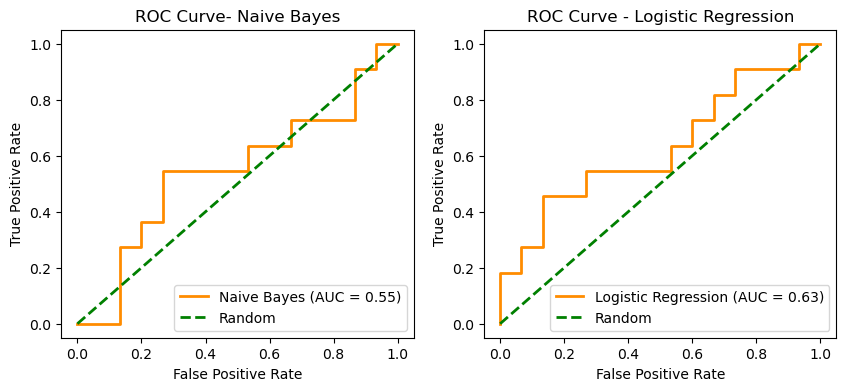

AUC - Logistic Regression: 0.63


<Figure size 640x480 with 0 Axes>

In [20]:
# Compute Probability predictions and ROC curve
#For Naive Bayes Model
y_probabilities_nb = nb_model.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_probabilities_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
#For Linear Regression Model
y_probabilities_lr = lr_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_probabilities_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(10, 4))

# Plot ROC curve for Naive Bayes Model
plt.subplot(1, 2, 1)
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='Naive Bayes (AUC = {:.2f})'.format(roc_auc_nb))
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve- Naive Bayes')
plt.legend(loc='lower right')
# Print the AUC value
print("AUC - Naive Bayes:", round(roc_auc_nb,3))

# Plot ROC curve for Logistic Regression Model
plt.subplot(1, 2, 2)
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_lr))
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()
# Print the AUC value
print("AUC - Logistic Regression:", round(roc_auc_lr,3))
# Adjust spacing between subplots
plt.tight_layout()  
plt.show()

## Confusion Metrix

>- The confusion matrix heatmap helps identify specific types of errors (false positives and false negatives) <br>
>- Here, I have created heatmap for the confusion matrix for both models to visualize the true positives, true negatives, false positives, and false negatives

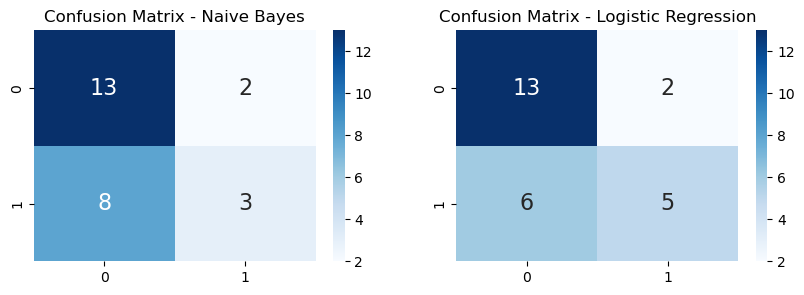

In [21]:
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix - Naive Bayes')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix - Logistic Regression')

plt.show()

## Precision-Recall Curve

>- The precision-recall curve illustrates the trade-offs between precision and recall at different probability thresholds
>- A model with a curve that consistently lies above the others indicates better performance 

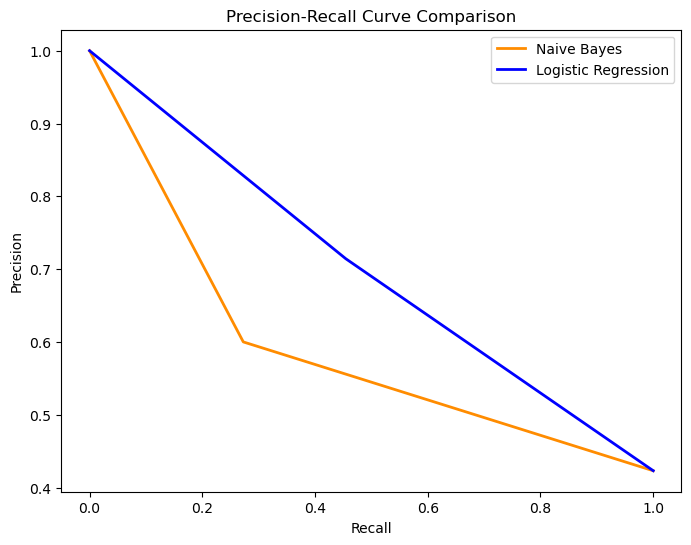

In [22]:
#Calculate precision and recall for both models and plot the same
precision_nb, recall_nb, _ = precision_recall_curve(y_test, y_pred_nb)
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
plt.plot(recall_nb, precision_nb, color='darkorange', lw=2, label='Naive Bayes')
plt.plot(recall_lr, precision_lr, color='blue', lw=2, label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc='upper right')
plt.show()


# Conclusion

In [30]:
# Define table data
data = {
    "Comparison Metric": ["Training Set", "Assumptions", "Features Handling", "Feature Importance",
                                      "Handling Imbalance Data", "Accuracy", "Precision", "Recall", "F1 Score",
                                      "Mean Accuracy - By Scoring Method", "ROC - AUC", "Confusion Matrix",
                                      "Precision-Recall Curve"],
    "Naive Bayes Model": [
        "Performs well with small training sets due to its simplicity and ability to estimate probabilities with limited data",
        "Assumes that the features are conditionally independent, given the class label whereas in real-world scenarios features are correlated.",
        "Has probabilistic nature and hence can handle both continuous and categorical feature",
        "Does not provide direct interpretability of feature importance",
        "Can be biased towards the majority class as it assumes equal importance for all features and hence may struggle with imbalanced data",
        "62%",
        "60%",
        "27%",
        "37%",
        "74%",
        "0.55",
        "[[13  2] [ 8  3]]",
        "Significant change in curve according to the probability threshold"
    ],
    "Logistic Regression Model": [
        "May require more data to avoid overfitting, especially when dealing with complex relationships",
        "Does not make this assumption and can handle correlated features more effectively.",
        "Cannot handle categorical features - requires transformation. Yet it can handle continuous features more flexibly using techniques like polynomial terms",
        "Provides interpretable results as it estimates coefficients/weights for each input variable which indicates the direction and strength of the relationship with the outcome",
        "Can handle imbalanced datasets by adjusting the decision threshold/using techniques like class weighting",
        "69%",
        "71%",
        "45%",
        "55%",
        "76%",
        "0.63",
        "[[13  2] [ 6  5]]",
        "Can observe a linear change in curve according to the probability threshold and is constantly above the Naive Bayes curve"
    ],
    "Inference": [
        "Given this scenario where data size is small, Naive Bayes Model would is preferable over Logistic Regression Model",
        "Logistic Regression model is more reliable with respect to reliable in real-world scenarios than Naive Bayes Model",
        "Given this scenario with data having no categorical transformation complexity, Logistic Regression Model is preferred over Naive Bayes as it is more flexible",
        "Logistic Regression Model is preferred over Naive Bayes as it gives Feature Importance which in turn increases the efficiency",
        "Logistic Regression Model is preferred over Naive Bayes as it is capable of handling imbalanced data (in case it exists) and reduce error in prediction",
        "It is very evident that the Logistic Regression Model has more accuracy when compared to Naive Bayes Model",
        "It indicates that the Logistic Regression Model's ability to make positive predictions correctly is higher than that of Naive Bayes Model",
        "It indicates that the Logistic Regression Model's ability to capture all positive instances among all actual positives correctly than that of Naive Bayes Model",
        "It is evident that Logistic Regression Model has a better balance and hence performs better when compared with Naive Bayes Model",
        "This implies that Logistic Regression Model has greater ability to generalize on unseen data when compared with Naive Bayes Model",
        "This indicates that Area Under Curve for Logistic Regression Model is greater, which makes it a better performer than Naive Bayes Model and also is considered better at distinguishing between classes",
        "Naive Bayes Model has a higher number of false negatives for the positive class, implying it is more prone to misclassification than that of Logistic Regression Model",
        "Logistic Regression Model curve clearly depicts better performance than Naive Bayes Model through its curve characteristics"
    ],
    "Preferred Model": ["Naive Bayes", "Logistic Regression", "Logistic Regression", "Logistic Regression",
                        "Logistic Regression", "Logistic Regression", "Logistic Regression", "Logistic Regression",
                        "Logistic Regression", "Logistic Regression", "Logistic Regression", "Logistic Regression",
                        "Logistic Regression"]
}

# Create DataFrame from the data
df = pd.DataFrame(data)

# Display the table
display(HTML(df.to_html(index=False)))

Comparison Metric,Naive Bayes Model,Logistic Regression Model,Inference,Preferred Model
Training Set,Performs well with small training sets due to its simplicity and ability to estimate probabilities with limited data,"May require more data to avoid overfitting, especially when dealing with complex relationships","Given this scenario where data size is small, Naive Bayes Model would is preferable over Logistic Regression Model",Naive Bayes
Assumptions,"Assumes that the features are conditionally independent, given the class label whereas in real-world scenarios features are correlated.",Does not make this assumption and can handle correlated features more effectively.,Logistic Regression model is more reliable with respect to reliable in real-world scenarios than Naive Bayes Model,Logistic Regression
Features Handling,Has probabilistic nature and hence can handle both continuous and categorical feature,Cannot handle categorical features - requires transformation. Yet it can handle continuous features more flexibly using techniques like polynomial terms,"Given this scenario with data having no categorical transformation complexity, Logistic Regression Model is preferred over Naive Bayes as it is more flexible",Logistic Regression
Feature Importance,Does not provide direct interpretability of feature importance,Provides interpretable results as it estimates coefficients/weights for each input variable which indicates the direction and strength of the relationship with the outcome,Logistic Regression Model is preferred over Naive Bayes as it gives Feature Importance which in turn increases the efficiency,Logistic Regression
Handling Imbalance Data,Can be biased towards the majority class as it assumes equal importance for all features and hence may struggle with imbalanced data,Can handle imbalanced datasets by adjusting the decision threshold/using techniques like class weighting,Logistic Regression Model is preferred over Naive Bayes as it is capable of handling imbalanced data (in case it exists) and reduce error in prediction,Logistic Regression
Accuracy,62%,69%,It is very evident that the Logistic Regression Model has more accuracy when compared to Naive Bayes Model,Logistic Regression
Precision,60%,71%,It indicates that the Logistic Regression Model's ability to make positive predictions correctly is higher than that of Naive Bayes Model,Logistic Regression
Recall,27%,45%,It indicates that the Logistic Regression Model's ability to capture all positive instances among all actual positives correctly than that of Naive Bayes Model,Logistic Regression
F1 Score,37%,55%,It is evident that Logistic Regression Model has a better balance and hence performs better when compared with Naive Bayes Model,Logistic Regression
Mean Accuracy - By Scoring Method,74%,76%,This implies that Logistic Regression Model has greater ability to generalize on unseen data when compared with Naive Bayes Model,Logistic Regression


......................................................................................................................................................................................................................................................

**Upon analysing and evaluating both the models thoroughly and fetching insights for every metrices , we can clearly state that for the given dataset Logistic Regression algorithm performs better than Naive Bayes algorithm**